<a href="https://colab.research.google.com/github/SamyakJain-2705/R-D-Project/blob/main/R_and_D_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tikzplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 2.4 MB/s 


In [ ]:
pip install plotter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import PIL
from PIL import Image
import sys
import os
from distutils.util import strtobool
import cv2
import math
import plotter
from matplotlib.image import imread
import matplotlib.pyplot as plt
import pywt
import matplotlib.image as mpimg


In [ ]:
# coding:utf-8


def WaveletTransform(sourceImage, n = 5):
# openCV_array[rows = 2, columns = 3, channel = 3]
#   = [[[r, g, b], [r, g, b], [r, g, b]],
#      [[r, g, b], [r, g, b], [r, g, b]]]

  if sourceImage.dtype == np.uint8:
    sourceImage = sourceImage.astype(np.uint16)
    sourceImage *= 257

  if not(sourceImage.shape[2]):
    sourceImage = sourceImage[:, :, np.newaxis]
  nChannel = sourceImage.shape[2]

  padding_bottom = math.ceil(sourceImage.shape[0] / pow(2, n)) * pow(2, n) - sourceImage.shape[0]
  padding_right = math.ceil(sourceImage.shape[1] / pow(2, n)) * pow(2, n) - sourceImage.shape[1]

  endBottomArray = sourceImage[sourceImage.shape[0] - 1, :, :]
  endBottomArray = endBottomArray.reshape(1, sourceImage.shape[1], sourceImage.shape[2])
  for i in range(0, padding_bottom):
    sourceImage = np.append(sourceImage, endBottomArray, axis = 0)

  endRightArray = sourceImage[:, sourceImage.shape[1] - 1, :]
  endRightArray = endRightArray.reshape(sourceImage.shape[0], 1, sourceImage.shape[2])
  for i in range(0, padding_right):
    sourceImage = np.append(sourceImage, endRightArray, axis = 1)

  sourceImage = sourceImage.astype(np.float32)
  rows, columns = sourceImage.shape[:2]
  resultImage = sourceImage.copy()
  for i in range(0, n):
    for channel in range(0, nChannel):
      for y in range(0, rows, 2):
        for x in range(0, columns, 2):
          half_y = y >> 1
          half_x = x >> 1
          half_rows = rows >> 1
          half_columns = columns >> 1

          valueIn_00 = sourceImage[y, x, channel]
          valueIn_01 = sourceImage[y, x + 1, channel]
          valueIn_10 = sourceImage[y + 1, x, channel]
          valueIn_11 = sourceImage[y + 1, x + 1, channel]

          valueOut_00 = (valueIn_00 + valueIn_01 + valueIn_10 + valueIn_11) / 4.0
          valueOut_01 = (valueIn_00 + valueIn_01 - valueIn_10 - valueIn_11) / 4.0
          valueOut_10 = (valueIn_00 - valueIn_01 + valueIn_10 - valueIn_11) / 4.0
          valueOut_11 = (valueIn_00 - valueIn_01 - valueIn_10 + valueIn_11) / 4.0

          resultImage[half_y, half_x, channel] = valueOut_00
          resultImage[half_y, half_columns + half_x, channel] = valueOut_01
          resultImage[half_rows + half_y, half_x, channel] = valueOut_10
          resultImage[half_rows + half_y, half_columns + half_x, channel] = valueOut_11

    sourceImage[:rows, :columns] = resultImage[:rows, :columns]
    rows = rows >> 1
    columns = columns >> 1
  resultImage = np.round((resultImage + 65535) / 2.0)
  return resultImage.astype(np.uint16)




In [ ]:
def ImageProcessing(runForward = True, runInverse = False, n = 3):
  print("Now loading the image...")
  img = cv2.imread("air.jpg", cv2.IMREAD_UNCHANGED)

  originalSize = img.shape[:2]
  print(originalSize)

  if runForward:
    print('yes')
    resultImage = WaveletTransform(img, n)
    img = resultImage.copy()
    cv2.imwrite("shuffle.jpg", resultImage)
   

 

def main():
  try:
    ImageProcessing()
  except Exception as e:
    print(e)

if __name__ == "__main__":
  main()


Now loading the image...
(512, 512)
yes


In [ ]:


def shuffleImage(im, seed=42):
    # Get pixels and put in Numpy array for easy shuffling
    pix = np.array(im.getdata())

    # Generate an array of shuffled indices
    # Seed random number generation to ensure same result
    np.random.seed(seed)
    indices = np.random.permutation(len(pix))

    # Shuffle the pixels and recreate image
    shuffled = pix[indices].astype(np.uint8)
 
    return Image.fromarray(shuffled.reshape(im.width,im.height,3))



# Load image and ensure RGB, i.e. not palette image
orig = Image.open('shuffle.jpg').convert('RGB')

result = shuffleImage(orig)
result.save('encrypt.jpg')



AES Encryption 

In [ ]:
pip install pycryptodome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 9.3 MB/s 


In [ ]:
import Crypto.Cipher 

In [ ]:
from Crypto.Cipher import AES

In [ ]:
import hashlib

In [ ]:
passw ="pi".encode()
key = hashlib.sha256(passw).digest()
print(key)

b'\x85\xb4.\x17\x02\x87|\x85\x1e\xb7A/\xe9X\xc8\xfbD|2\x07\xb4y\x8f\xad\xabB\xea\x859\x04l\xe1'


In [ ]:
mode = Crypto.Cipher.AES.MODE_CBC
import matplotlib.pyplot as plt


In [ ]:
from Crypto.Random import get_random_bytes

In [ ]:
from Crypto.Util.Padding import pad, unpad

In [ ]:
from google.colab.patches import cv2_imshow

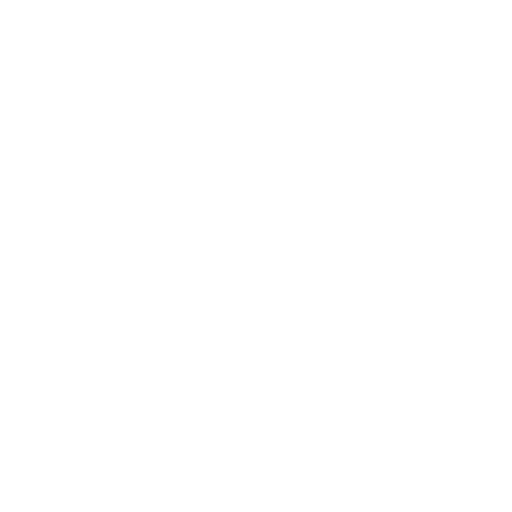

In [ ]:


import sys

import cv2
import numpy as np
if mode != Crypto.Cipher.AES.MODE_CBC and mode != Crypto.Cipher.AES.MODE_ECB:
    print('Only CBC and ECB mode supported...')
    sys.exit()

# Set sizes
keySize = 16
ivSize = Crypto.Cipher.AES.block_size if mode == Crypto.Cipher.AES.MODE_CBC else 0

#
# Start Encryption ----------------------------------------------------------------------------------------------
#

# Load original image
imageOrig = cv2.imread("encrypt.jpg")
rowOrig, columnOrig, depthOrig = imageOrig.shape
# print(imageOrig.shape)

# Check for minimum width
minWidth = (Crypto.Cipher.AES.block_size + Crypto.Cipher.AES.block_size) // depthOrig + 1
if columnOrig < minWidth:
    print('The minimum width of the image must be {} pixels, so that IV and padding can be stored in a single additional row!'.format(minWidth))
    sys.exit()

# Display original image
cv2_imshow( imageOrig)


# Convert original image data to bytes

imageOrigBytes = imageOrig.tobytes()


In [ ]:
from hashlib import md5
# Encrypt
key_hash = input('key: ')

    # Encode given key to 16 byte ascii key with md5 operation
key = md5(key_hash.encode('ascii')).digest()

key: er


b'\x81\x8f\x9cE\xcf\xa3\x0e\xef\xf2w\xef8\xbc\xbe\x99\x10'


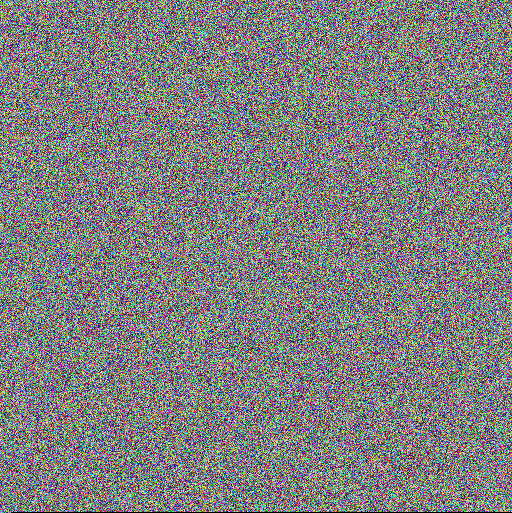

In [ ]:
iv = get_random_bytes(ivSize)
cipher = Crypto.Cipher.AES.new(key, Crypto.Cipher.AES.MODE_CBC, iv) if mode == Crypto.Cipher.AES.MODE_CBC else Crypto.Cipher.AES.new(key, Crypto.Cipher.AES.MODE_ECB)
imageOrigBytesPadded = pad(imageOrigBytes, Crypto.Cipher.AES.block_size)
ciphertext = cipher.encrypt(imageOrigBytesPadded)
print(key)


# Convert ciphertext bytes to encrypted image data
#    The additional row contains columnOrig * DepthOrig bytes. Of this, ivSize + paddedSize bytes are used
#    and void = columnOrig * DepthOrig - ivSize - paddedSize bytes unused
paddedSize = len(imageOrigBytesPadded) - len(imageOrigBytes)
void = columnOrig * depthOrig - ivSize - paddedSize
ivCiphertextVoid = iv + ciphertext + bytes(void)
imageEncrypted = np.frombuffer(ivCiphertextVoid, dtype = imageOrig.dtype).reshape(rowOrig + 1, columnOrig, depthOrig)
# print(ivCiphertextVoid)

# Display encrypted image
cv2_imshow(imageEncrypted)


# Save the encrypted image (optional)
#    If the encrypted image is to be stored, a format must be chosen that does not change the data. Otherwise,
#    decryption is not possible after loading the encrypted image. bmp does not change the data, but jpg does.
#    When saving with imwrite, the format is controlled by the extension (.jpg, .bmp). The following works:
#    cv2.imwrite("topsecretEnc.bmp", imageEncrypted)
#    imageEncrypted = cv2.imread("topsecretEnc.bmp")

#
# Start Decryption ----------------------------------------------------------------------------------------------
#

# Convert encrypted image data to ciphertext bytes
rowEncrypted, columnOrig, depthOrig = imageEncrypted.shape
rowOrig = rowEncrypted - 1
encryptedBytes = imageEncrypted.tobytes()
iv = encryptedBytes[:ivSize]
imageOrigBytesSize = rowOrig * columnOrig * depthOrig
paddedSize = (imageOrigBytesSize // Crypto.Cipher.AES.block_size + 1) * Crypto.Cipher.AES.block_size - imageOrigBytesSize
encrypted = encryptedBytes[ivSize : ivSize + imageOrigBytesSize + paddedSize]
# plt.savefig('2121.jpg')

# Decrypt


Inverse


key: er


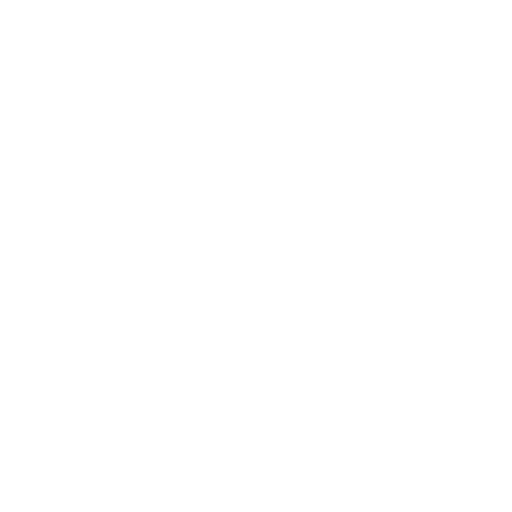

In [ ]:
key_hash = input('key: ')

    # Encode given key to 16 byte ascii key with md5 operation
key = md5(key_hash.encode('ascii')).digest()
cipher = Crypto.Cipher.AES.new(key, Crypto.Cipher.AES.MODE_CBC, iv) if mode == Crypto.Cipher.AES.MODE_CBC else Crypto.Cipher.AES.new(key, Crypto.Cipher.AES.MODE_ECB)
decryptedImageBytesPadded = cipher.decrypt(encrypted)
decryptedImageBytes = unpad(decryptedImageBytesPadded, Crypto.Cipher.AES.block_size)

# Convert bytes to decrypted image data
decryptedImage = np.frombuffer(decryptedImageBytes, imageEncrypted.dtype).reshape(rowOrig, columnOrig, depthOrig)

# Display decrypted image
cv2_imshow( decryptedImage) 
cv2.imwrite("output.jpg", decryptedImage)
cv2.waitKey()

# Close all windows
cv2.destroyAllWindows()















Inverse Walelet 

In [ ]:
pip install plotter


In [ ]:
pip install tikzplotlib

In [ ]:
def unshuffleImage(im, seed=42):

    # Get shuffled pixels in Numpy array
    shuffled = np.array(im.getdata())
    nPix = len(shuffled)

    # Generate unshuffler
    np.random.seed(seed)
    indices = np.random.permutation(nPix)
    unshuffler = np.zeros(nPix, np.uint32)
    unshuffler[indices] = np.arange(nPix)

    unshuffledPix = shuffled[unshuffler].astype(np.uint8)
    return Image.fromarray(unshuffledPix.reshape(im.width,im.height,3))
orig = Image.open('output.jpg').convert('RGB')
unshuffled = unshuffleImage(result)
unshuffled.save('unshuffle.jpg')

In [ ]:
def InverseWaveletTransform(sourceImage, n = 5):

  if not(sourceImage.shape[2]):
    sourceImage = sourceImage[:, :, np.newaxis]
  nChannel = sourceImage.shape[2]

  padding_bottom = math.ceil(sourceImage.shape[0] / pow(2, n)) * pow(2, n) - sourceImage.shape[0]
  padding_right = math.ceil(sourceImage.shape[1] / pow(2, n)) * pow(2, n) - sourceImage.shape[1]

  endBottomArray = sourceImage[sourceImage.shape[0] - 1, :, :]
  endBottomArray = endBottomArray.reshape(1, sourceImage.shape[1], sourceImage.shape[2])
  for i in range(0, padding_bottom):
    sourceImage = np.append(sourceImage, endBottomArray, axis = 0)

  endRightArray = sourceImage[:, sourceImage.shape[1] - 1, :]
  endRightArray = endRightArray.reshape(sourceImage.shape[0], 1, sourceImage.shape[2])
  for i in range(0, padding_right):
    sourceImage = np.append(sourceImage, endRightArray, axis = 1)

  sourceImage = sourceImage.astype(np.float32)
  sourceImage = sourceImage * 2.0 - 65535.0

  rows, columns = sourceImage.shape[:2]
  rows = int(rows / pow(2, n - 1))
  columns = int(columns / pow(2, n - 1))
  resultImage = sourceImage.copy()
  for i in range(0, n):
    for channel in range(0, nChannel):
      for y in range(0, rows, 2):
        for x in range(0, columns, 2):
          half_y = y >> 1
          half_x = x >> 1
          half_rows = rows >> 1
          half_columns = columns >> 1

          valueIn_00 = sourceImage[half_y, half_x, channel]
          valueIn_01 = sourceImage[half_y, half_columns + half_x, channel]
          valueIn_10 = sourceImage[half_rows + half_y, half_x, channel]
          valueIn_11 = sourceImage[half_rows + half_y, half_columns + half_x, channel]

          valueOut_00 = (valueIn_00 + valueIn_01 + valueIn_10 + valueIn_11)
          valueOut_01 = (valueIn_00 + valueIn_01 - valueIn_10 - valueIn_11)
          valueOut_10 = (valueIn_00 - valueIn_01 + valueIn_10 - valueIn_11)
          valueOut_11 = (valueIn_00 - valueIn_01 - valueIn_10 + valueIn_11)

          resultImage[y, x, channel] = valueOut_00
          resultImage[y, x + 1, channel] = valueOut_01
          resultImage[y + 1, x, channel] = valueOut_10
          resultImage[y + 1, x + 1, channel] = valueOut_11

    sourceImage[:rows, :columns] = resultImage[:rows, :columns]
    rows = rows << 1
    columns = columns << 1
    resultImage = resultImage.clip(0,65535)
  resultImage = resultImage.astype(np.uint16)
  return resultImage


In [ ]:


def ImageProcessing(runForward = False, runInverse = True, n = 3):
  print("Now loading the image...")
  img = cv2.imread("unshuffle.jpg", cv2.IMREAD_UNCHANGED)

  originalSize = img.shape[:2]
  print(originalSize)

  # if runForward:
  #   print('yes')
  #   resultImage = WaveletTransform(img, n)
  #   img = resultImage.copy()
  #   cv2.imwrite("testResultForward.png", resultImage)
   

  if runInverse:
    resultImage = InverseWaveletTransform(img, n)
    resultImage = resultImage[:originalSize[0], :originalSize[1], :]
    cv2.imwrite("result.jpg", resultImage)
   

def main():
  try:
    ImageProcessing()
  except Exception as e:
    print(e)

if __name__ == "__main__":
  main()


Now loading the image...
(512, 512)
